In [23]:
# GREEN CART LTD Sales and Customer Behaviour Insights 

#Import Libraries

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



#construct filepath

filepath = Path("D:/Uptrail Internship/Second Project")
sales_file = filepath / "sales_data.csv"
product_file = filepath / "product_info.csv"
customer_file = filepath / "customer_info.csv"

#Load the dataset
sales_df = pd.read_csv(sales_file)
product_df = pd.read_csv(product_file)
customer_df = pd.read_csv(customer_file)


#Preview the data


print(sales_df.head())
print(product_df.head())
print(customer_df.head())

  order_id customer_id product_id quantity  unit_price order_date  \
0  O966977      C00397      P0022        3       39.25   06-07-25   
1  O696648      C00236      P0023        5       18.92   06-07-25   
2  O202644      C00492      P0011        1       29.68   06-07-25   
3  O501803      C00031      P0003        1       32.76   06-07-25   
4  O322242      C00495      P0016        1       47.62   06-07-25   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20  
  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage    11-03-25       15.88   
1      P0002      Cleaning Product 82       Cleaning 

In [2]:
#CLEAN THE DATA

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [3]:
sales_df.isnull().sum()

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

In [105]:
sales_df.duplicated().sum()
customer_df.duplicated().sum()
product_df.duplicated().sum()



np.int64(0)

In [5]:
#checking for inconcistent values
#sales_df['delivery_status'].value_counts(dropna=False)
#sales_df['payment_method'].value_counts(dropna=False)
#sales_df['region'].value_counts(dropna=False)

for col in ['delivery_status', 'payment_method', 'region']:
    print(f"\n--- {col} ---")
    print(sales_df[col].value_counts(dropna=False))


--- delivery_status ---
delivery_status
Delivered      637
delivered      594
 DELAYED       591
 Cancelled     591
Delayed        582
NaN              3
delrd            1
delyd            1
Name: count, dtype: int64

--- payment_method ---
payment_method
Bank Transfer    780
PayPal           763
Credit Card      735
credit card      718
NaN                3
bank transfr       1
Name: count, dtype: int64

--- region ---
region
North      605
Central    603
East       602
South      596
West       593
nrth         1
Name: count, dtype: int64


In [6]:
#CLEAN THE DATA
sales_df['delivery_status'] = sales_df['delivery_status'].str.strip().str.title()
sales_df['payment_method'] = sales_df['payment_method'].str.strip().str.title()
sales_df['region'] = sales_df['region'].str.strip().str.title()
for col in ['delivery_status', 'payment_method', 'region']:
    print(f"\n--- {col} ---")
    print(sales_df[col].value_counts(dropna=False))


--- delivery_status ---
delivery_status
Delivered    1231
Delayed      1173
Cancelled     591
NaN             3
Delrd           1
Delyd           1
Name: count, dtype: int64

--- payment_method ---
payment_method
Credit Card      1453
Bank Transfer     780
Paypal            763
NaN                 3
Bank Transfr        1
Name: count, dtype: int64

--- region ---
region
North      605
Central    603
East       602
South      596
West       593
Nrth         1
Name: count, dtype: int64


In [52]:
#Fix known typos/inconsistencies
delivery_map = {
    'Delrd': 'Delivered',
    'Delyd': 'Delayed'
}
sales_df['delivery_status'] = sales_df['delivery_status'].replace(delivery_map)

payment_map = {
    'Bank Transfr': 'Bank Transfer'
}
sales_df['payment_method'] = sales_df['payment_method'].replace(payment_map)

sales_df['region'] = sales_df['region'].astype(str).str.strip().str.lower()

region_map = {
    'Nrth': 'North',
    'nrth': 'North',
    'north': 'North',
    'west': 'West',
    'east': 'East',
    'south': 'South',
    'central': 'Central',
    
}
sales_df['region'] = sales_df['region'].replace(region_map)

customer_df['loyalty_tier'] = customer_df['loyalty_tier'].astype(str).str.strip().str.lower()


loyalty_map = {
    'gold': 'Gold',
    'GOLD': 'Gold',
    'gld' : 'Gold',
    'Gld' : 'Gold',
    'bronze': 'Bronze',
    'brnze': 'Bronze',
    'Brnze': 'Bronze',
    'silver': 'Silver',
    'sllver' : 'Silver',
    'Sllver' : 'Silver',
    'nan': 'Unknown'
}
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].replace(loyalty_map)


print(sales_df['region'].unique())
print(sales_df['region'].unique())

['Central' 'North' 'West' 'East' 'South']
['Central' 'North' 'West' 'East' 'South']


In [13]:
for col in ['delivery_status', 'payment_method', 'region']:
    print(f"\n--- {col} ---")
    print(sales_df[col].value_counts(dropna=False))


--- delivery_status ---
delivery_status
Delivered    1232
Delayed      1174
Cancelled     591
NaN             3
Name: count, dtype: int64

--- payment_method ---
payment_method
Credit Card      1453
Bank Transfer     781
Paypal            763
NaN                 3
Name: count, dtype: int64

--- region ---
region
North      606
Central    603
East       602
South      596
West       593
Name: count, dtype: int64


In [14]:
# CONVERT DATE COLUMN TO DATETIME
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], dayfirst=True, errors='coerce')
print(sales_df['order_date'].dtype)

datetime64[ns]


In [15]:
sales_df['delivery_status'].isnull().sum()

np.int64(3)

In [47]:
sales_df['region'].isnull().sum()
sales_df['delivery_status'] = sales_df['delivery_status'].fillna('Unknown')
sales_df['payment_method'] = sales_df['payment_method'].fillna('Unknown')
sales_df['region'] = sales_df['region'].fillna('Unknown')
sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)
sales_df = sales_df.drop_duplicates(subset='order_id')
print(sales_df['discount_applied'].unique())

[0.   0.15 0.2  0.1  0.05]


In [25]:
#Validate numeric columns
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')
sales_df['unit_price'] = pd.to_numeric(sales_df['unit_price'], errors='coerce')
sales_df['discount_applied'] = pd.to_numeric(sales_df['discount_applied'], errors='coerce')

# Drop rows where conversion failed
sales_df.dropna(subset=['quantity', 'unit_price', 'discount_applied'], inplace=True)

sales_df = sales_df[
    (sales_df['quantity'] >= 0) &
    (sales_df['unit_price'] >= 0) &
    (sales_df['discount_applied'] >= 0)
]



In [35]:
#CLEAN PRODUCT
# Standardize text fields
product_df['category'] = product_df['category'].str.strip().str.title()

# Convert date column
product_df['launch_date'] = product_df['launch_date'].replace('', pd.NA)
product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], dayfirst=True, errors='coerce')


# Handle missing values
product_df['category'] = product_df['category'].fillna("Other")

# Remove duplicates
product_df = product_df.drop_duplicates(subset='product_id')
print(product_df['launch_date'].dtype)

datetime64[ns]


In [34]:
#CLEAN CUSTOMER

# Standardize text fields
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.strip().str.title()
customer_df['region'] = customer_df['region'].str.strip().str.title()

# Convert date column
customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], dayfirst=True, errors='coerce')

# Handle missing values
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna("Unknown")

# Remove duplicates
customer_df = customer_df.drop_duplicates(subset='customer_id')
print(customer_df['signup_date'].dtype)

datetime64[ns]


In [31]:
#MERGE THE DATA
# Merge sales with product
merged_df = pd.merge(sales_df, product_df, on='product_id', how='left')

# Merge with customer data
merged_df = pd.merge(merged_df, customer_df, on='customer_id', how='left')

# Check results
print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2476 non-null   object        
 1   customer_id       2476 non-null   object        
 2   product_id        2472 non-null   object        
 3   quantity          2477 non-null   float64       
 4   unit_price        2477 non-null   float64       
 5   order_date        2475 non-null   object        
 6   delivery_status   2477 non-null   object        
 7   payment_method    2477 non-null   object        
 8   region_x          2477 non-null   object        
 9   discount_applied  2477 non-null   float64       
 10  product_name      2472 non-null   object        
 11  category          2472 non-null   object        
 12  launch_date       2472 non-null   datetime64[ns]
 13  base_price        2472 non-null   float64       
 14  supplier_code     2472 n

In [48]:
#FEATURE ENGINEERING

#Calculate revenue
merged_df['quantity'] = pd.to_numeric(merged_df['quantity'], errors='coerce')
merged_df['unit_price'] = pd.to_numeric(merged_df['unit_price'], errors='coerce')
merged_df['discount_applied'] = pd.to_numeric(merged_df['discount_applied'], errors='coerce')
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], errors='coerce')
merged_df['launch_date'] = pd.to_datetime(merged_df['launch_date'], errors='coerce')

# Revenue calculation
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

# Extract ISO week
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

# Price band
merged_df['price_band'] = pd.cut(merged_df['unit_price'],
                                 bins=[0, 15, 30, float('inf')],
                                 labels=['Low', 'Medium', 'High'])

# Days between launch and order
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

# Extract email domain
merged_df['email_domain'] = merged_df['email'].str.split('@').str[-1]

# Late delivery flag
merged_df['is_late'] = merged_df['delivery_status'] == 'Delayed'
print(merged_df.info())
print(merged_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 2470 entries, 0 to 2476
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2469 non-null   object        
 1   customer_id       2469 non-null   object        
 2   product_id        2470 non-null   object        
 3   quantity          2470 non-null   float64       
 4   unit_price        2470 non-null   float64       
 5   order_date        2470 non-null   datetime64[ns]
 6   delivery_status   2470 non-null   object        
 7   payment_method    2470 non-null   object        
 8   region            2470 non-null   object        
 9   discount_applied  2470 non-null   float64       
 10  product_name      2470 non-null   object        
 11  category          2470 non-null   object        
 12  launch_date       2470 non-null   datetime64[ns]
 13  base_price        2470 non-null   float64       
 14  supplier_code     2470 non-nu

In [57]:
#Create Summary Table

#weekly revenue by region
merged_df = merged_df.drop(columns=['region_y'], errors='ignore')  # 'errors=ignore' avoids crash if not present
print(merged_df.columns.tolist())
merged_df = merged_df.rename(columns={'region_x': 'region'})

weekly_revenue = merged_df.groupby(['order_week','region'])['revenue'].sum().reset_index()
print(weekly_revenue)

['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'order_date', 'delivery_status', 'payment_method', 'region', 'discount_applied', 'product_name', 'category', 'launch_date', 'base_price', 'supplier_code', 'email', 'signup_date', 'gender', 'loyalty_tier', 'revenue', 'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late', 'signup_month']
   order_week   region     revenue
0          23  Central  37199.7815
1          23     East  39026.6280
2          23    North  37310.8275
3          23    South  40167.9025
4          23     West  39584.6865
5          23     nrth     19.5120


In [41]:
# Product category performance
category_performance = merged_df.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'discount_applied': 'mean'
}).reset_index()
print(category_performance)

        category     revenue  quantity  discount_applied
0       Cleaning  75166.9440    2961.0          0.103263
1        Kitchen  25642.7460     964.0          0.095298
2       Outdoors  32889.2440    1257.0          0.097524
3  Personal Care  21412.1665     771.0          0.103557
4        Storage  38198.2375    1437.0          0.097490


In [69]:
# Customer behavior by loyalty tier and signup month
loyalty_map = {
    'gold': 'Gold',
    'GOLD': 'Gold',
    'gld' : 'Gold',
    'Gld' : 'Gold',
    'bronze': 'Bronze',
    'brnze': 'Bronze',
    'Brnze': 'Bronze',
    'silver': 'Silver',
    'sllver' : 'Silver',
    'Sllver' : 'Silver',
    'nan': 'Unknown'
}
delivery_map = {
    'Delrd': 'Delivered',
    'Delyd': 'Delayed',
    'delivered': 'Delivered',
    'delrd': 'Delivered',
    'DELAYED': 'Delayed',
    
}
merged_df['delivery_status'] = merged_df['delivery_status'].replace(delivery_map)
merged_df['loyalty_tier'] = merged_df['loyalty_tier'].replace(loyalty_map)
merged_df['signup_date'] = pd.to_datetime(merged_df['signup_date'], dayfirst = True, errors='coerce')

merged_df['signup_month'] = merged_df['signup_date'].dt.month
loyalty_behavior = merged_df.groupby(['loyalty_tier', 'signup_month']).agg({
    'revenue': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'}).reset_index()
print(loyalty_behavior)

   loyalty_tier  signup_month     revenue  order_count
0        Bronze           1.0   3450.8845           47
1        Bronze           2.0   3911.1260           46
2        Bronze           3.0   2501.8820           26
3        Bronze           4.0   3373.1135           42
4        Bronze           5.0   2690.1980           39
5        Bronze           6.0   4946.2760           68
6        Bronze           7.0   3213.8280           48
7        Bronze           8.0   2463.6910           33
8        Bronze           9.0   2565.2130           35
9        Bronze          10.0   3009.8535           41
10       Bronze          11.0   3522.0055           45
11       Bronze          12.0   2831.2285           36
12         Gold           1.0   8982.0555          119
13         Gold           2.0  10090.4475          114
14         Gold           3.0   7901.3925          107
15         Gold           4.0   6401.8540           83
16         Gold           5.0   7133.0950           97
17        

In [70]:
# Delivery performance by region and price band
merged_df.rename(columns={'region_x': 'region'}, inplace=True)


delivery_performance = merged_df.groupby(['region','price_band'])['is_late'].mean().reset_index()
print(delivery_performance)

     region price_band   is_late
0   Central        Low  0.153846
1   Central     Medium  0.169312
2   Central       High  0.206573
3      East        Low  0.202703
4      East     Medium  0.203046
5      East       High  0.218182
6     North        Low  0.159574
7     North     Medium  0.217391
8     North       High  0.191837
9     South        Low  0.192771
10    South     Medium  0.194969
11    South       High  0.254032
12     West        Low  0.227273
13     West     Medium  0.169082
14     West       High  0.193694
15     nrth        Low       NaN
16     nrth     Medium  0.000000
17     nrth       High       NaN


C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_24168\1845237036.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_performance = merged_df.groupby(['region','price_band'])['is_late'].mean().reset_index()


In [55]:
# Preferred payment method by loyalty tier
payment_pref = merged_df.groupby(['loyalty_tier', 'payment_method'])['order_id'].count().reset_index()
payment_pref.rename(columns={'order_id': 'order_count'}, inplace=True)
print(payment_pref)

   loyalty_tier payment_method  order_count
0        Bronze  Bank Transfer          149
1        Bronze    Credit Card          126
2        Bronze         PayPal          128
3        Bronze    credit card          110
4          Gold  Bank Transfer          327
5          Gold    Credit Card          354
6          Gold         PayPal          348
7          Gold        Unknown            2
8          Gold   bank transfr            1
9          Gold    credit card          338
10       Silver  Bank Transfer          159
11       Silver    Credit Card          129
12       Silver         PayPal          135
13       Silver        Unknown            1
14       Silver    credit card          134
15      Unknown    Credit Card            5
16      Unknown         PayPal            3
17      Unknown    credit card            1


In [106]:
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')
signup_analysis = merged_df.groupby('signup_month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum'),
    avg_order_per_customer=('order_id', 'count'),
    unique_customers=('customer_id', 'nunique')
).reset_index()
merged_df['days_signup_to_order'] = (merged_df['order_date'] - merged_df['signup_date']).dt.days
signup_days_gap = merged_df.groupby('signup_month')['days_signup_to_order'].mean().reset_index(name='avg_days_to_order')
signup_summary = pd.merge(signup_analysis, signup_days_gap, on='signup_month')
signup_summary


,signup_month,total_orders,total_revenue,avg_order_per_customer,unique_customers,avg_days_to_order
0,2024-07,179,13737.3630,179,36,325.916201
1,2024-08,220,18443.8600,220,49,296.095455
2,2024-09,205,15898.3720,205,41,262.229268
3,2024-10,226,18047.8310,226,47,233.778761
4,2024-11,239,19196.6800,239,45,203.305439
5,2024-12,210,15795.5005,210,45,172.438095
6,2025-01,199,14666.1930,199,40,142.829146
7,2025-02,216,18099.4965,216,43,113.912037
8,2025-03,195,15240.2920,195,37,83.801020
9,2025-04,170,12761.7820,170,33,51.147059


C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_24168\2602517787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=signup_summary, x='signup_month', y='total_orders', palette='Blues')


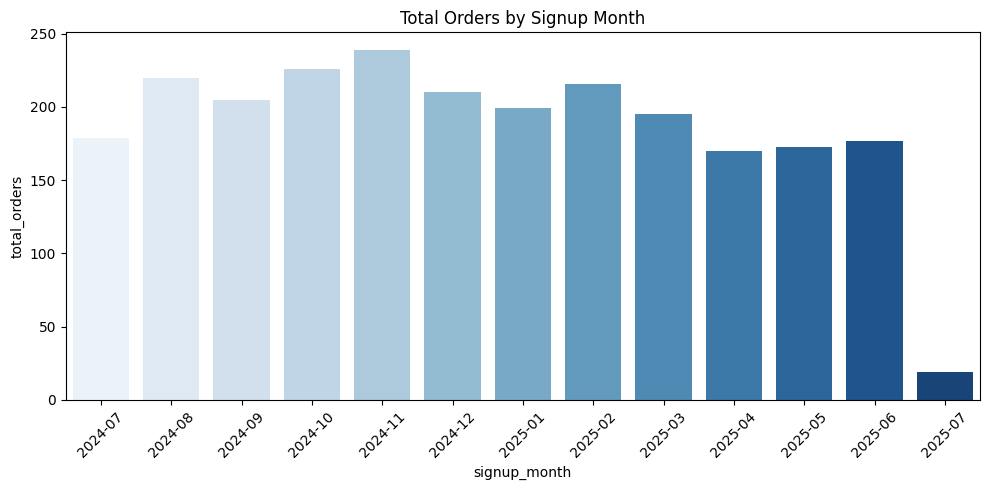

In [107]:
#Plot: Orders by Signup Month
plt.figure(figsize=(10,5))
sns.barplot(data=signup_summary, x='signup_month', y='total_orders', palette='Blues')
plt.title("Total Orders by Signup Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: Invalid object type at position 0

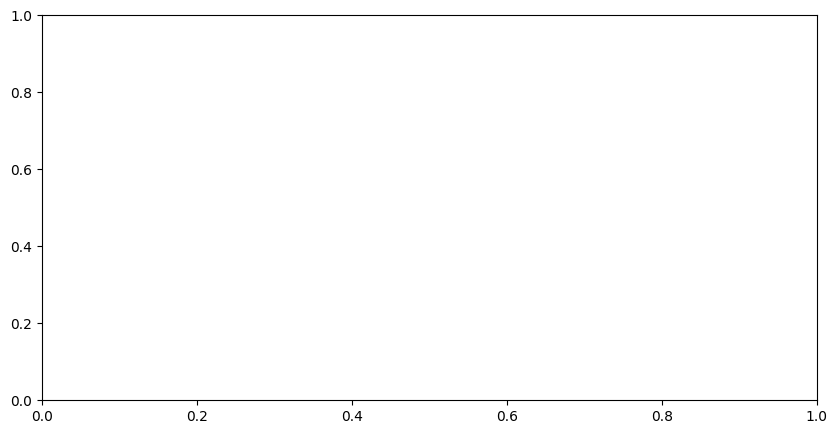

In [108]:
#Plot: Revenue by Signup Month

plt.figure(figsize=(10,5))
sns.lineplot(data=signup_summary, x='signup_month', y='total_revenue', marker='o', color='green')
plt.title("Revenue by Signup Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_24168\3661246882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=signup_summary, x='signup_month', y='avg_days_to_order', palette='coolwarm')


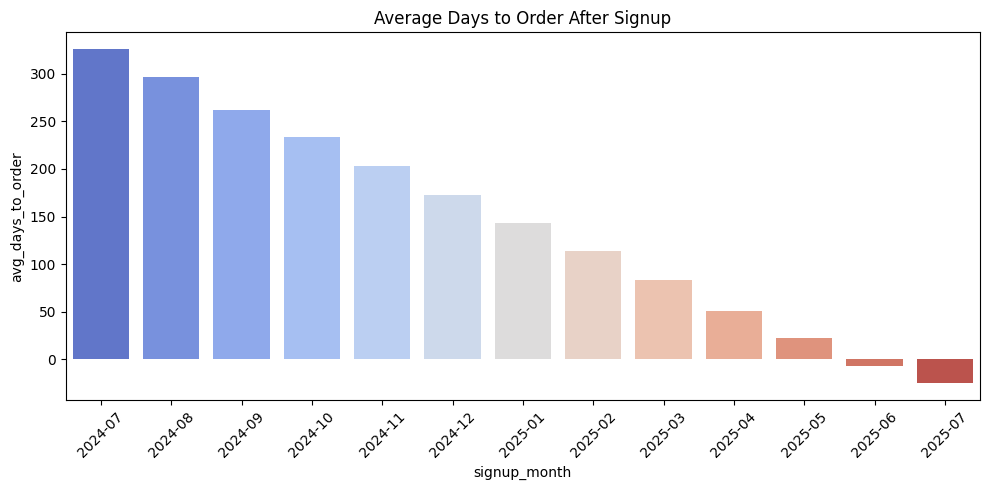

In [109]:
#Plot: Avg Days Between Signup and Order
plt.figure(figsize=(10,5))
sns.barplot(data=signup_summary, x='signup_month', y='avg_days_to_order', palette='coolwarm')
plt.title("Average Days to Order After Signup")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



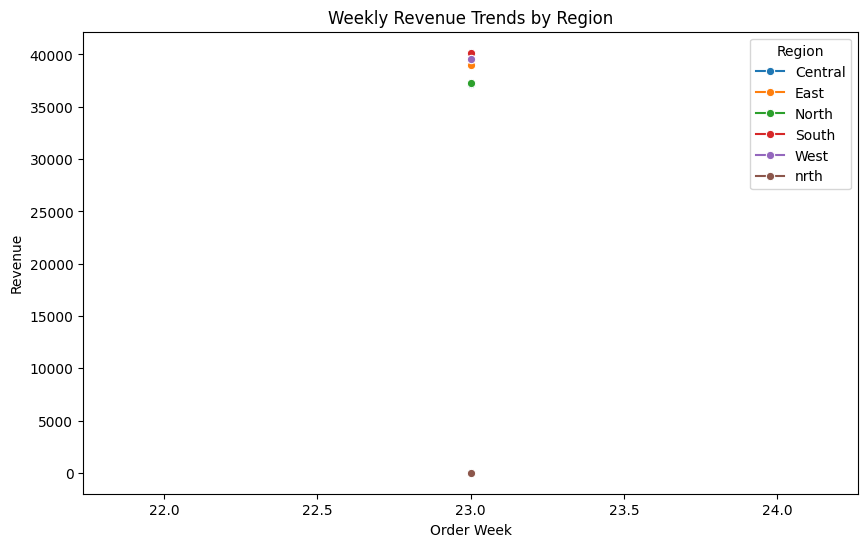

In [62]:
#VISUALIZATION
weekly_revenue = weekly_revenue.sort_values(by=['region', 'order_week'])


# 1. Line plot - weekly revenue trends by region
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_revenue, x='order_week', y='revenue', hue='region', marker='o')
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('Order Week')
plt.ylabel('Revenue')
plt.legend(title='Region')
plt.show()

In [59]:
print(weekly_revenue.isna().sum())


order_week    0
region        0
revenue       0
dtype: int64


In [60]:
print(weekly_revenue.head())


   order_week   region     revenue
0          23  Central  37199.7815
1          23     East  39026.6280
2          23    North  37310.8275
3          23    South  40167.9025
4          23     West  39584.6865


In [63]:
print(weekly_revenue['order_week'].nunique())


1


C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_24168\2553852496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='category', y='revenue', palette='Blues_d')


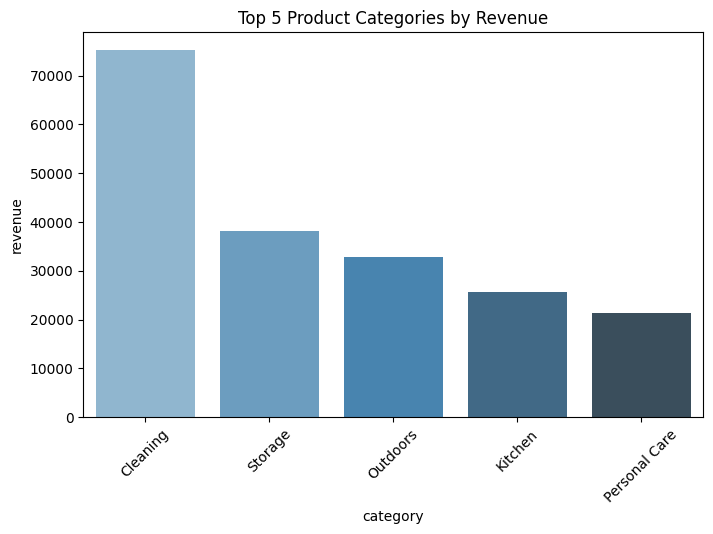

In [64]:
# 2. Bar chart - Top 5 categories by revenue
top_categories = category_performance.sort_values('revenue', ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(data=top_categories, x='category', y='revenue', palette='Blues_d')
plt.title('Top 5 Product Categories by Revenue')
plt.xticks(rotation=45)
plt.show()

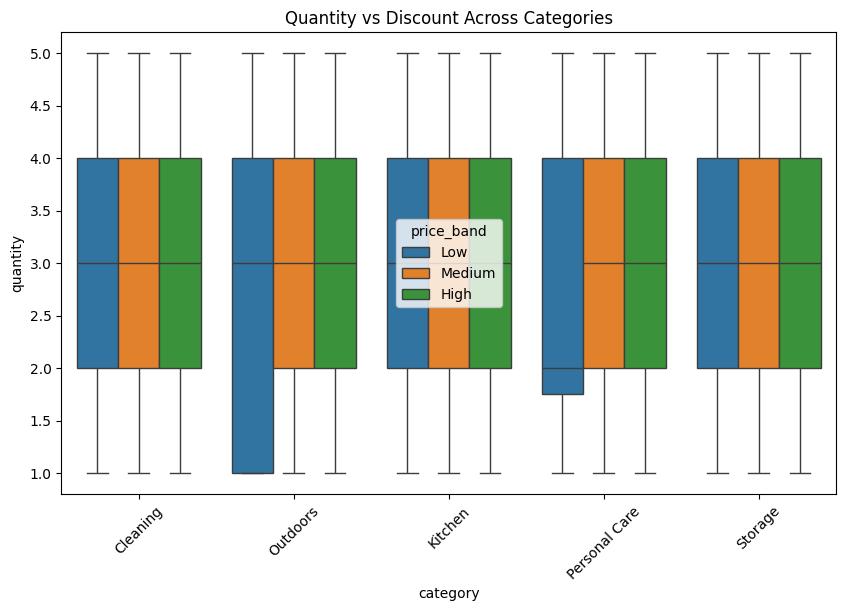

In [65]:
# 3. Boxplot - quantity vs discount across categories
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='category', y='quantity', hue='price_band')
plt.title('Quantity vs Discount Across Categories')
plt.xticks(rotation=45)
plt.show()


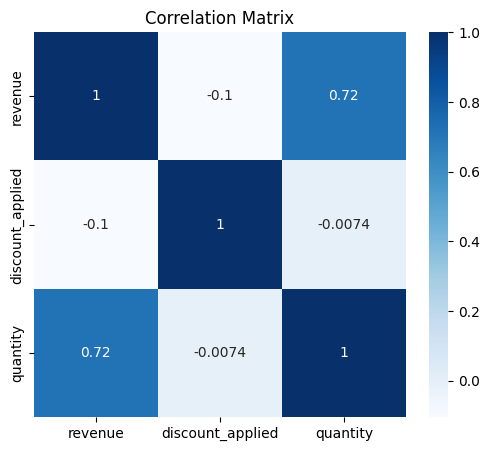

In [66]:
# 4. Heatmap - correlation between revenue, discount, and quantity
plt.figure(figsize=(6,5))
corr = merged_df[['revenue', 'discount_applied', 'quantity']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

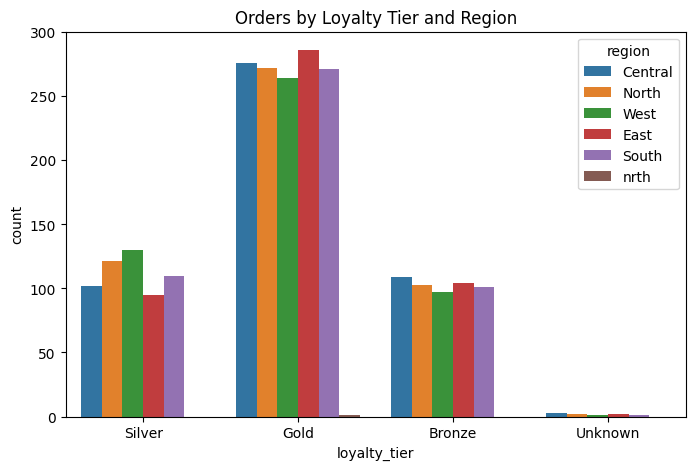

In [67]:
# 5. Countplot - orders by loyalty tier and region
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='loyalty_tier', hue='region')
plt.title('Orders by Loyalty Tier and Region')
plt.show()

C:\Users\kpk laptops\AppData\Local\Temp\ipykernel_24168\1637085204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_counts = merged_df.groupby('price_band')['delivery_status'].value_counts().unstack()


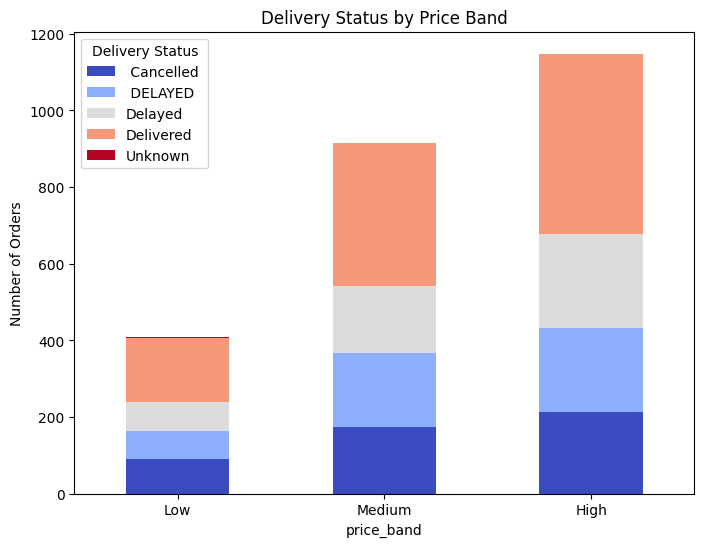

In [71]:
# 6. Pie chart - delivery status by price band
delivery_counts = merged_df.groupby('price_band')['delivery_status'].value_counts().unstack()
delivery_counts.plot(kind='bar', stacked=True, figsize=(8,6), colormap='coolwarm')
plt.title('Delivery Status by Price Band')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.legend(title='Delivery Status')
plt.show()

In [78]:
# CUSTOMERS WHO SIGN UP IN Q2, ORDER WITHIN 14 DAYS AND RECEIVED A DISCOUNT GREATER THAN 20%
# Days between sign up and order

merged_df['days_from_signup_to_order'] = (merged_df['signup_date'] - merged_df['order_date']).dt.days
#Sign up dates are April, May and June, 4,5,6
q2_customers = merged_df.query(
    '(signup_date.dt.month >= 4 and signup_date.dt.month <= 6) and '
    '(days_from_signup_to_order <= 14) and '
    '(discount_applied > 0.2)'
)
q2_customers.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,...,gender,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month,days_from_signup_to_order


In [79]:
merged_df['signup_date'].dt.month.value_counts().sort_index()


signup_date
1.0     199
2.0     216
3.0     196
4.0     170
5.0     173
6.0     177
7.0     198
8.0     220
9.0     205
10.0    226
11.0    239
12.0    210
Name: count, dtype: int64

In [80]:
merged_df['days_from_signup_to_order'].describe()


count    2429.000000
mean     -162.712639
std       102.551300
min      -336.000000
25%      -248.000000
50%      -166.000000
75%       -80.000000
max        29.000000
Name: days_from_signup_to_order, dtype: float64

In [81]:
merged_df['discount_applied'].value_counts(bins=5)


(0.08, 0.12]                      506
(0.12, 0.16]                      506
(0.04, 0.08]                      502
(0.16, 0.2]                       479
(-0.0012000000000000001, 0.04]    477
Name: count, dtype: int64

In [82]:
merged_df['days_from_signup_to_order'] = (merged_df['order_date'] - merged_df['signup_date']).dt.days


In [83]:
print(merged_df['days_from_signup_to_order'])

0       272.0
1       305.0
2       255.0
3       314.0
4       262.0
        ...  
2472    218.0
2473    226.0
2474    103.0
2475    228.0
2476    122.0
Name: days_from_signup_to_order, Length: 2470, dtype: float64


In [84]:
merged_df['days_from_signup_to_order'].describe()


count    2429.000000
mean      162.712639
std       102.551300
min       -29.000000
25%        80.000000
50%       166.000000
75%       248.000000
max       336.000000
Name: days_from_signup_to_order, dtype: float64

In [85]:
within_14 = merged_df[merged_df['days_from_signup_to_order'] <= 14]
print("Orders within 14 days:", within_14.shape)


Orders within 14 days: (239, 27)


In [86]:
discounted = merged_df[merged_df['discount_applied'] > 0.2]
print("Discounts > 20%:", discounted.shape)


Discounts > 20%: (0, 27)


In [87]:
q2_customers = merged_df[
    (merged_df['signup_date'].dt.month.between(4, 6)) &
    (merged_df['days_from_signup_to_order'] <= 14) &
    (merged_df['discount_applied'] > 0.2)
]

print("Q2 customers matching all criteria:", q2_customers.shape)
q2_customers.head()


Q2 customers matching all criteria: (0, 27)


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,...,gender,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month,days_from_signup_to_order


In [88]:
step1 = merged_df[merged_df['signup_date'].dt.month.between(4, 6)]
print("Step 1:", step1.shape)

Step 1: (520, 27)


In [89]:
step1 = merged_df[merged_df['signup_date'].dt.month.between(4, 6)]
print("Step 1:", step1.shape)

step2 = step1[step1['days_from_signup_to_order'] <= 14]
print("Step 2:", step2.shape)

step3 = step2[step2['discount_applied'] > 0.2]
print("Step 3:", step3.shape)


Step 1: (520, 27)
Step 2: (220, 27)
Step 3: (0, 27)


In [90]:
q2_customers = merged_df[merged_df['signup_date'].dt.month.isin([4, 5, 6])]
print("Q2 Signups:", q2_customers.shape)


Q2 Signups: (520, 27)


In [91]:
orders_within_14_days = merged_df[merged_df['days_from_signup_to_order'] <= 14]
print("Orders within 14 days of signup:", orders_within_14_days.shape)

Orders within 14 days of signup: (239, 27)


In [92]:
discount_gt_20 = merged_df[merged_df['discount_applied'] > 0.2]
print("Orders with >20% discount:", discount_gt_20.shape)


Orders with >20% discount: (0, 27)


In [94]:
#USE MINMAXSCALER TO NORMALIZE REVENUE AND PRICE
scaler = MinMaxScaler()
merged_df['revenue_scaled'] = scaler.fit_transform(merged_df[['revenue']])
merged_df[['revenue', 'revenue_scaled']].head()

,revenue,revenue_scaled
0,117.750,0.457431
1,94.600,0.361987
2,25.228,0.075976
3,26.208,0.080016
4,38.096,0.129029


In [95]:
merged_df['unit_price_scaled'] = scaler.fit_transform(merged_df[['unit_price']])
merged_df[['unit_price', 'unit_price_scaled']].head()

,unit_price,unit_price_scaled
0,39.25,0.744225
1,18.92,0.260062
2,29.68,0.516313
3,32.76,0.589664
4,47.62,0.943558


In [102]:
#FLAG UNDERPERFORMING PRODUCTS
merged_df['underperforming'] = (
    (merged_df['quantity'] < 10) &
    (merged_df['discount_applied'] > 0.1) &
    (merged_df['delivery_status'] == 'Delayed')
)
underperforming = merged_df[merged_df['underperforming']]
print(f"Underperforming records: {underperforming.shape[0]}")


Underperforming records: 178


In [103]:
print("Quantity < 10:", merged_df[merged_df['quantity'] < 10].shape[0])
print("Discount > 0.1:", merged_df[merged_df['discount_applied'] > 0.1].shape[0])
print("Delivery Status = 'Delayed':", merged_df[merged_df['delivery_status'] == 'Delayed'].shape[0])


Quantity < 10: 2470
Discount > 0.1: 985
Delivery Status = 'Delayed': 493
